## FIT5196-S2-2020 ASSESSEMENT 3
#### Student name: Binh MinH Tran
#### Student ID: 30475422

## Task 1: Data Integration

Integrate 7 different input datasets including:
* Hospitals (pdf file)
* Supermarkets (excel file)
* Shopping centers (html file)
* Real estate (json and xml files)
* Vic_suburb_boundary
* GTFS_Melbourne_Train_Information 

### 1.1. Parsing pdf file

In [1]:
pip install tabula-py

     |████████████████████████████████| 11.7MB 313kB/s 


In [2]:
# import pdf file
import tabula
file = "hospitals.pdf"
table = tabula.read_pdf(file,pages=1)
hospitals = table[0]

In [3]:
# drop unnamed column and na if any
hospitals = hospitals.drop('Unnamed: 0',1)
phospitalsdf = hospitals.dropna(0, how = 'all')
hospitals = hospitals.dropna(1, how = 'all')

In [9]:
# take a look at the imported data
hospitals.head(3)

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital


In [7]:
# check distribution of lat and lng
hospitals.describe()

,lat,lng
count,49.000000,49.000000
mean,-37.504056,144.632720
std,0.664371,1.092551
min,-38.545479,141.237173
25%,-37.855469,144.815624
50%,-37.788107,145.015201
75%,-37.557401,145.165998
max,-35.799279,146.312423


In [6]:
# check missing values and data types
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49 non-null     object 
 1   lat     49 non-null     float64
 2   lng     49 non-null     float64
 3   name    49 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [8]:
# check for unique hospital id
len(hospitals['id'].unique())

49

### 1.2. Parsing excel file

In [10]:
# import excel file
import pandas as pd
excel_data = pd.ExcelFile('supermarkets.xlsx')
super_markets =  excel_data.parse('Sheet1')

In [12]:
# drop unnamed column and na if any
super_markets = super_markets.drop('Unnamed: 0', axis=1)
super_markets = super_markets.dropna(0, how = 'all')
super_markets = super_markets.dropna(1, how = 'all')

In [13]:
# take a look at the dataset
super_markets.head(3)

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths


In [14]:
# check distribution of lat and lng
super_markets.describe()

,lat,lng
count,239.000000,239.000000
mean,-37.553054,144.990823
std,1.515833,2.347418
min,-41.161591,115.898108
25%,-37.985597,144.840538
50%,-37.823910,145.041720
75%,-37.719955,145.238921
max,-21.142496,153.273270


In [15]:
# check missing values and data types
super_markets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      239 non-null    object 
 1   lat     239 non-null    float64
 2   lng     239 non-null    float64
 3   type    239 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.3+ KB


In [16]:
# check for unique hospital id
len(super_markets['id'].unique())

239

### 1.3. Parsing html file

In [17]:
# import html file with Beautiful Soup
from bs4 import BeautifulSoup
f = open("/content/shopingcenters.html", encoding="utf8")     
soup = BeautifulSoup(f)
f.close()

# get table from html
tables = soup.find_all("table")
table = tables[0]

# get data from table and turn into pandas dataframe
table_data = [[cell.text for cell in row.find_all(["th","td"])] for row in table.find_all("tr")]
shopping_centers = pd.DataFrame(table_data)

In [18]:
# remove abudant column, correct column name
shopping_centers = shopping_centers.drop(0,axis=1)
shopping_centers.columns = shopping_centers.iloc[0,:]
shopping_centers.drop(index=0,inplace=True)
shopping_centers = shopping_centers.reset_index(drop=True)

In [19]:
# take a look at the dataset
shopping_centers.head(3)

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065


In [22]:
# check missing values and data types
shopping_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sc_id   119 non-null    object
 1   lat     119 non-null    object
 2   lng     119 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB


In [23]:
shopping_centers =shopping_centers.astype({'lat':'float64','lng':'float64'})

In [24]:
# check distribution of lat and lng
shopping_centers.describe()

,lat,lng
count,119.000000,119.000000
mean,-27.760466,113.923414
std,25.383978,79.472027
min,-38.383368,-103.846811
25%,-37.890654,144.608029
50%,-37.812753,144.964064
75%,-37.618487,145.142859
max,45.499327,151.237777


There are some shopping centers with odd latitude and longitude, I check in the google map and they are some where far away in the Europe or maybe in the middle of the ocean. I have no way to fix these so I just remove every out of bound shopping centers.

In [27]:
shopping_centers = shopping_centers[(shopping_centers['lat'] < 0) & (shopping_centers['lng'] > 0)]
shopping_centers = shopping_centers.reset_index(drop=True)

In [28]:
# check distribution of lat and lng
shopping_centers.describe()

,lat,lng
count,103.000000,103.000000
mean,-37.686080,145.080721
std,0.804829,1.344130
min,-38.383368,137.520319
25%,-37.944316,144.885377
50%,-37.819325,144.994680
75%,-37.736267,145.172402
max,-33.027816,151.237777


After remove strange samples, the data look normal again, similar to other dataset with mean lat around -35 ~ 37 and mean long around 144 ~ 145.

### 1.4. Parsing json file

In [29]:
# import json data file
import json

with open('./real_state.json') as f:
  data = json.load(f)

json = pd.DataFrame(data)


In [30]:
# take a look at the data
json.head(3)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,87107,-37.907873,144.991190,8 Cadby Street,33600000,house,2016,4,3,2
1,65099,-37.813056,145.315607,118 Liverpool Road,4303000,house,2013,4,2,0
2,68670,-37.855055,145.022366,8 Moorhouse Street,23140000,house,2011,3,2,1


### 1.5. Parsing xml file

In [31]:
# import xml file
import xml.etree.ElementTree as etree    
from lxml import objectify

xml = objectify.parse("real_state.xml")
root = xml.getroot()

data = []
for i in range(len(root.getchildren())):
  data.append([child.text for child in root.getchildren()[i].getchildren()])

df = pd.DataFrame(data).T
df.columns = ['property_id', 'lat', 'lng', 'addr_street', 'price', 'property_type', 'year', 'bedrooms', 'bathrooms', 'parking_space']

In [32]:
# take a look at the data
df.tail(3)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
1004,47989,-37.801228,145.02619099999998,17 Molesworth Street,4740000,house,2016,4,2,2
1005,40372,-37.71441,145.040399,31 Cash Street,8470000,house,2016,3,2,3
1006,24923,-37.581520000000005,144.90794,1 Wattletree Street,5060000,house,2014,4,2,2


### 1.6. Joining json and xml dataset

In [38]:
# concatenate 2 real estate dataset along rows
real_estate = pd.concat([json, df], axis=0)
real_estate = real_estate.reset_index(drop=True)

In [36]:
# take a look at the data
real_estate

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,87107,-37.907873,144.991190,8 Cadby Street,33600000,house,2016,4,3,2
1,65099,-37.813056,145.315607,118 Liverpool Road,4303000,house,2013,4,2,0
2,68670,-37.855055,145.022366,8 Moorhouse Street,23140000,house,2011,3,2,1
3,37971,-37.772679,145.025928,127 Grange Road,9814000,house,2011,3,2,2
4,52209,-37.825393,145.011156,12 Khartoum Street,4807000,house,2016,4,3,1
...,...,...,...,...,...,...,...,...,...,...
2012,84395,-37.855423,144.987396,80 Peel Street,10850000,house,2009,2,1,0
2013,18114,-37.671000,144.923125,1253 Pascoe Vale Road,6288000,house,2016,3,1,1
2014,47989,-37.801228,145.026191,17 Molesworth Street,4740000,house,2016,4,2,2
2015,40372,-37.714410,145.040399,31 Cash Street,8470000,house,2016,3,2,3


In [39]:
# check missing values and data types
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    2017 non-null   object
 1   lat            2017 non-null   object
 2   lng            2017 non-null   object
 3   addr_street    2017 non-null   object
 4   price          2017 non-null   object
 5   property_type  2017 non-null   object
 6   year           2017 non-null   object
 7   bedrooms       2017 non-null   object
 8   bathrooms      2017 non-null   object
 9   parking_space  2017 non-null   object
dtypes: object(10)
memory usage: 157.7+ KB


In [40]:
# correct the data types for later calculation and aggregation
real_estate = real_estate.astype({'lat':'float64', 'lng':'float64', 'price':'int64', 'year':'int64', 'bedrooms':'int64', 'bathrooms':'int64', 'parking_space':'int64'})

In [41]:
# check distribution of numerical data
real_estate.describe()

,lat,lng,price,year,bedrooms,bathrooms,parking_space
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000
mean,-37.804124,145.037705,9.182707e+06,2012.252355,3.231036,1.565196,1.524541
std,0.099166,0.134293,5.814574e+06,2.593734,0.761922,0.608992,0.790894
min,-38.074352,144.633537,1.062000e+06,2005.000000,1.000000,1.000000,0.000000
25%,-37.864096,144.937768,5.130000e+06,2010.000000,3.000000,1.000000,1.000000
50%,-37.795872,145.033129,7.610000e+06,2012.000000,3.000000,2.000000,2.000000
75%,-37.735204,145.109431,1.125000e+07,2015.000000,4.000000,2.000000,2.000000
max,-37.569869,145.370617,4.420000e+07,2016.000000,5.000000,3.000000,3.000000


The is no problem in the distribution of latitude and longitude 

In [42]:
real_estate['property_type'].value_counts().sort_index()

house    2017
Name: property_type, dtype: int64

In [43]:
real_estate['year'].value_counts().sort_index()

2005      1
2006      8
2007     17
2008    132
2009    236
2010    215
2011    207
2012    226
2013    194
2014    254
2015    288
2016    239
Name: year, dtype: int64

In [44]:
real_estate['bedrooms'].value_counts().sort_index()

1      15
2     246
3    1129
4     512
5     115
Name: bedrooms, dtype: int64

There are no problem in number of bedroom in each property. Most of the properties have 3 bedrooms.

In [45]:
real_estate['bathrooms'].value_counts().sort_index()

1    1003
2     888
3     126
Name: bathrooms, dtype: int64

The number bathrooms per property seems normal, most of the properties have 1 bathroom.

In [46]:
real_estate['parking_space'].value_counts().sort_index()

0     239
1     621
2    1017
3     140
Name: parking_space, dtype: int64

The number of parking space are normal, most of the properties have 2 parking spaces.

### 1.7. Parsing text file

In [50]:
# import needed files to calculate time to CBD
train_stops = pd.read_csv('stops.txt', sep=",")
train_trip = pd.read_csv('stop_times.txt', sep=",")
trips = pd.read_csv('trips.txt', sep=",")
calendar = pd.read_csv('calendar.txt', sep=",")

In [51]:
# change columns name to match other dataframe
train_stops = train_stops.rename(columns={'stop_lat':'lat', 'stop_lon':'lng'})

In [52]:
# check distribution of lat and lng
train_stops.describe()

,stop_id,lat,lng
count,218.000000,218.000000,218.000000
mean,20678.151376,-37.854410,145.043714
std,4335.915404,0.138308,0.140996
min,15351.000000,-38.374235,144.661118
25%,19879.250000,-37.898707,144.959826
50%,19933.500000,-37.826147,145.032403
75%,19990.750000,-37.775067,145.121494
max,46468.000000,-37.579091,145.486379


### 1.8. Integrate dataset

#### 1.8.1. Adding surburb

In [59]:
pip install pyshp

     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=2a4d762ef2b5afd2719a559008a85e61bc6791ba387a2f5c4d6a8ea014a7beec
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp


In [60]:
import numpy
import matplotlib
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapely.geometry as geometry

In [61]:
# import shape file
sf = shapefile.Reader("VIC_LOCALITY_POLYGON_shp")
records = sf.records()
shapes = sf.shapes()

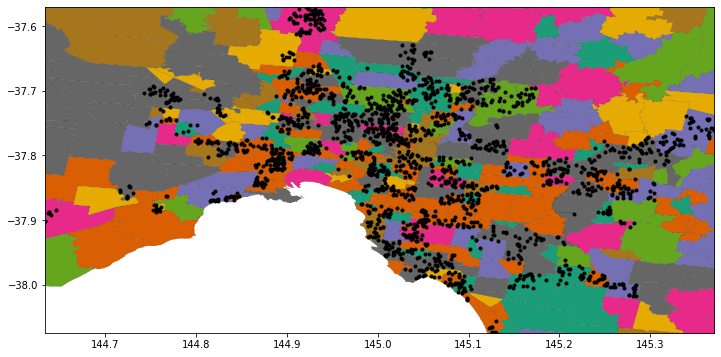

In [62]:
# plotting the surburb map and position of properties
cm = matplotlib.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*numpy.arange(Nshp)/Nshp)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

for nshp in range(Nshp):
  ptchs = []
  pts = numpy.array(shapes[nshp].points)
  prt = shapes[nshp].parts
  par = list(prt) + [pts.shape[0]]

  for pij in range(len(prt)):
    ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
  ax.add_collection(PatchCollection(ptchs, facecolor=cccol[nshp,:], edgecolor='k', linewidths=0.1))

plt.plot(real_estate['lng'], real_estate['lat'],marker=".", linestyle="", color='black')

ax.set_xlim(144.6335,145.3706)
ax.set_ylim(-38.0744,-37.5699)
plt.show()


In [63]:
def locate_sub(data):
  '''
    Finding surburb for each coordinate
  '''
  loc = data['lng'], data['lat']
  records = sf.records()
  shapes = sf.shapes()
  for i in range(0, len(shapes)):
    boundary = shapes[i]
    name_ = records[i][6]

    if geometry.Point(loc).within(geometry.shape(boundary)):
      name_ = records[i][6]
      return name_

In [ ]:
real_estate['surburb'] = real_estate.apply(locate_sub, axis=1)

In [ ]:
# take a look at the results
real_estate.head(3)

In [ ]:
# backup data
real_estate.to_csv('real_estate_sub.csv', index=False)

In [ ]:
# reorder the columns
real_estate = real_estate[['property_id','lat','lng','addr_street','surburb','price','property_type','year','bedrooms','bathrooms','parking_space']]

#### 1.8.2 Adding near by locations:

In [48]:
import math
# function to find minimum distance between two location 
def min_location(dataA, dataB): 
  '''
    Function to identify the nearest location B to location A
    Location A is each property 
    Location B can be a hospital, a supermarket or a shopping center
    Output: location B id for each location A id
  ''' 
  radius = 6378 # Earth radius

  min_dist = 0.0
  nearest_locB = str()
  latA, lngA = dataA.loc['lat'], dataA.loc['lng']

  for j in dataB.index:      
    
    latB, lngB = dataB.loc[j, 'lat'], dataB.loc[j, 'lng']

    # calculate the distance between each location possible
    dlat = math.radians(latB - latA)
    dlng = math.radians(lngB - lngA)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(latA)) * math.cos(math.radians(latB)) * math.sin(dlng/2) * math.sin(dlng/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))      
    d = radius * c

    # identify the minimum distance for locA to locB
    if j == 0:
      min_dist = d
      nearest_locB = dataB.iloc[j, 0]

    elif d <= min_dist:
      min_dist = d
      nearest_locB = dataB.iloc[j, 0]
      
  return (nearest_locB, min_dist)


In [57]:
# add nearest shopping center and distance to it
real_estate['Shopping_center_id'] = real_estate.apply(lambda x: min_location(x, shopping_centers)[0], axis=1)
real_estate['Distance_to_sc'] = real_estate.apply(lambda x: min_location(x, shopping_centers)[1], axis=1)

# add nearest train station and distance to it
real_estate['Train_station_id'] = real_estate.apply(lambda x: min_location(x, train_stops)[0], axis=1)
real_estate['Distance_to_train_station'] = real_estate.apply(lambda x: min_location(x, train_stops)[1], axis=1)

# place holder for distance to CBD and transfer flag
real_estate['travel_min_to_CBD'] = 0 # default value
real_estate['Transfer_flag'] = -1 # default value

# add nearest hospital and distance to it
real_estate['Hospital_id'] = real_estate.apply(lambda x: min_location(x, hospitals)[0], axis=1)
real_estate['Distance_to_hospital'] = real_estate.apply(lambda x: min_location(x, hospitals)[1], axis=1)

# add nearest supermarket and distance to it
real_estate['Supermarket_id'] = real_estate.apply(lambda x: min_location(x, super_markets)[0], axis=1)
real_estate['Distance_to_supermarket'] = real_estate.apply(lambda x: min_location(x, super_markets)[1], axis=1)

In [58]:
# take a look at the results
real_estate.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,87107,-37.907873,144.991190,8 Cadby Street,33600000,house,2016,4,3,2,SC_015,4.457996,19951,0.924508,0,-1,hospital_013,2.323314,S_150,0.651356
1,65099,-37.813056,145.315607,118 Liverpool Road,4303000,house,2013,4,2,0,SC_022,3.256251,19877,3.163655,0,-1,hospital_049,6.227128,S_224,1.300124
2,68670,-37.855055,145.022366,8 Moorhouse Street,23140000,house,2011,3,2,1,SC_038,2.034227,19945,0.309206,0,-1,hospital_012,2.075356,S_235,0.811352
3,37971,-37.772679,145.025928,127 Grange Road,9814000,house,2011,3,2,2,SC_001,1.493098,19931,0.790158,0,-1,hospital_039,1.120798,S_219,1.474455
4,52209,-37.825393,145.011156,12 Khartoum Street,4807000,house,2016,4,3,1,SC_038,1.708713,19906,0.398048,0,-1,hospital_042,1.581068,S_102,1.684290


#### 1.8.3 Adding time to CBD

In [64]:
# look for Flinder Station stop id
train_stops[train_stops['stop_name']=='Flinders Street Railway Station']

,stop_id,stop_name,stop_short_name,lat,lng
29,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964


In [65]:
# flag trips that go through Flinder station
train_trip['to_flinder'] = train_trip['stop_id'].apply(lambda x: 1 if x == 19854 else 0)

In [66]:
# weekday where trip run at least one day from Monday to Friday
calendar['weekday'] = calendar['monday'] + calendar['tuesday'] + calendar['wednesday'] + calendar['thursday'] + calendar['friday']

In [67]:
# new dataframe for trips go through Flinder station
train_to_flinder = train_trip.groupby('trip_id').agg(
    start_time = ('departure_time', min),
    end_time = ('arrival_time', max),
    # stop_counts = ('stop_sequence', count),
    flinder_flag = ('to_flinder', sum)
)

In [68]:
# number of trip go through Flinder station
len(train_to_flinder[train_to_flinder['flinder_flag']==1].index)

17850

In [76]:
# get service_id for each trip, to know it run on weekday or not
train_trip = train_trip.merge(trips[['trip_id','service_id']], on='trip_id', how='left')

In [77]:
# get only trips that run on weekday
train_trip = train_trip[train_trip['service_id'].isin(calendar[calendar['weekday']>0]['service_id'])][['trip_id','arrival_time','departure_time','stop_id','stop_sequence']]

In [78]:
# get only trips that run between 7AM and 9AM and go through Flinder station
train_trip = train_trip[train_trip['trip_id'].isin(train_to_flinder[(train_to_flinder['start_time'] >= '07:00:00') & (train_to_flinder['start_time'] <= '09:00:00') & (train_to_flinder['flinder_flag'] == 1)].index)]

In [79]:
# get only trips that stop at Flinder station
at_flinder = train_trip[train_trip['stop_id']==19854][['trip_id','arrival_time','departure_time','stop_id','stop_sequence']]

In [80]:
train_trip.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
1005,17183036.T6.2-ALM-B-mjp-1.2.H,07:01:00,07:01:00,19847,1
1006,17183036.T6.2-ALM-B-mjp-1.2.H,07:02:00,07:02:00,19848,2
1007,17183036.T6.2-ALM-B-mjp-1.2.H,07:04:00,07:04:00,19849,3


In [81]:
at_flinder.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
1021,17183036.T6.2-ALM-B-mjp-1.2.H,07:37:00,07:37:00,19854,18
1038,17183054.T6.2-ALM-B-mjp-1.2.H,09:12:00,09:12:00,19854,18
1055,17183040.T6.2-ALM-B-mjp-1.2.H,07:53:00,07:53:00,19854,18


In [82]:
# merge two dataframe together, left join on trip_id
stations_to_flinder = train_trip.merge(at_flinder, on='trip_id', how='left')

In [84]:
stations_to_flinder.head(3)

,trip_id,arrival_time_x,departure_time_x,stop_id_x,stop_sequence_x,arrival_time_y,departure_time_y,stop_id_y,stop_sequence_y
0,17183036.T6.2-ALM-B-mjp-1.2.H,07:01:00,07:01:00,19847,1,07:37:00,07:37:00,19854,18
1,17183036.T6.2-ALM-B-mjp-1.2.H,07:02:00,07:02:00,19848,2,07:37:00,07:37:00,19854,18
2,17183036.T6.2-ALM-B-mjp-1.2.H,07:04:00,07:04:00,19849,3,07:37:00,07:37:00,19854,18


In [88]:
from datetime import datetime
def time_between(data):
  '''
    Function to calculate time different between time depart from a station and time arrive to Flinder station
  '''
  td = (datetime.strptime(data['arrival_time_y'], '%H:%M:%S') - datetime.strptime(data['departure_time_x'], '%H:%M:%S')).seconds/60
  return td

In [89]:
# calculate time in minute from a station to Flinder station
stations_to_flinder['time_to_flinder'] = stations_to_flinder.apply(time_between, axis=1)

In [90]:
stations_to_flinder.head(5)

,trip_id,arrival_time_x,departure_time_x,stop_id_x,stop_sequence_x,arrival_time_y,departure_time_y,stop_id_y,stop_sequence_y,time_to_flinder
0,17183036.T6.2-ALM-B-mjp-1.2.H,07:01:00,07:01:00,19847,1,07:37:00,07:37:00,19854,18,36.0
1,17183036.T6.2-ALM-B-mjp-1.2.H,07:02:00,07:02:00,19848,2,07:37:00,07:37:00,19854,18,35.0
2,17183036.T6.2-ALM-B-mjp-1.2.H,07:04:00,07:04:00,19849,3,07:37:00,07:37:00,19854,18,33.0
3,17183036.T6.2-ALM-B-mjp-1.2.H,07:06:00,07:06:00,19850,4,07:37:00,07:37:00,19854,18,31.0
4,17183036.T6.2-ALM-B-mjp-1.2.H,07:08:00,07:08:00,19851,5,07:37:00,07:37:00,19854,18,29.0


In [91]:
# get only trips to Flinder, remove trips from Flinder
stations_to_flinder = stations_to_flinder[stations_to_flinder['stop_sequence_y'] > stations_to_flinder['stop_sequence_x']]

In [101]:
# get avarage time from a station to Flinder station
time_to_flinder = stations_to_flinder[['stop_id_x','time_to_flinder']].groupby('stop_id_x').mean()
time_to_flinder = time_to_flinder.reset_index()
time_to_flinder = time_to_flinder.rename(columns={"stop_id_x": "Train_station_id", "time_to_flinder": "travel_min_to_flinder"})

In [107]:
# add time to CBD to real estate dataframe
real_estate = real_estate.merge(time_to_flinder, on='Train_station_id', how='left')

In [109]:
# fill in place holder for travel_min_to_CBD
real_estate['travel_min_to_CBD'] = real_estate['travel_min_to_flinder'].apply(lambda x: x if x > 0 else 0)
real_estate = real_estate.drop('travel_min_to_flinder', axis=1)

In [98]:
# transfer flag
real_estate['Transfer_flag'] = real_estate['Train_station_id'].apply(lambda x: 1 if x in stations_to_flinder['stop_id_x'].unique() else 0)


In [114]:
real_estate.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,87107,-37.907873,144.991190,8 Cadby Street,33600000,house,2016,4,3,2,SC_015,4.457996,19951,0.924508,21.933333,1,hospital_013,2.323314,S_150,0.651356
1,65099,-37.813056,145.315607,118 Liverpool Road,4303000,house,2013,4,2,0,SC_022,3.256251,19877,3.163655,54.500000,1,hospital_049,6.227128,S_224,1.300124
2,68670,-37.855055,145.022366,8 Moorhouse Street,23140000,house,2011,3,2,1,SC_038,2.034227,19945,0.309206,19.846154,1,hospital_012,2.075356,S_235,0.811352
3,37971,-37.772679,145.025928,127 Grange Road,9814000,house,2011,3,2,2,SC_001,1.493098,19931,0.790158,20.250000,1,hospital_039,1.120798,S_219,1.474455
4,52209,-37.825393,145.011156,12 Khartoum Street,4807000,house,2016,4,3,1,SC_038,1.708713,19906,0.398048,12.741935,1,hospital_042,1.581068,S_102,1.684290


In [112]:
# check for non direct transfers to CBD
real_estate[real_estate['Transfer_flag']==0]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,travel_min_to_flinder
582,1527,-37.791331,144.896175,9 Tait Street,7720000,house,2012,4,3,1,SC_011,2.019357,20027,1.104274,0.0,0,hospital_003,0.627933,S_201,1.060517,NaN
1020,11446,-37.772579,144.877000,4 Waterford Avenue,9800000,house,2016,3,2,2,SC_052,0.774547,20027,3.145231,0.0,0,hospital_003,2.433850,S_049,1.078910,NaN
1497,75,-37.831116,144.967880,59/69 Dorcas Street,9900000,house,2009,1,1,1,SC_101,0.924618,19854,1.428310,0.0,0,hospital_022,1.684418,S_016,0.919365,NaN
1674,1383,-37.787823,144.892085,7/36 Empire St,5440000,house,2015,2,1,1,SC_085,1.618913,20027,1.365652,0.0,0,hospital_003,0.555274,S_201,1.530159,NaN
